## $\textbf{2. Initial Value Problems for ODEs}$

### 2.1 Introduction  

https://math.stackexchange.com/questions/721076/help-with-using-the-runge-kutta-4th-order-method-on-a-system-of-2-first-order-od

In this section, we shall be concerned with the construction and analysis of numerical methods for *first-order differential equation* of the form:

$$ y' = f(x,y) \quad \quad (2.1)$$

for the real-valued function $y$ of the real variable $x$, where $y' = \frac{dy}{dx}$ and $f$ is a function of two variables. Furthermore, we are also given an **Initial Condition**, inorder to select a particular integral from infinite family of solutions: given two real numbers $x_0$ and $y_0$, we seek a solution to above equation for $x>x_0$ such that:

$$ y(x_0) = y_0 \quad \quad (2.2)$$ 

The differential equation together with the initial condition is called the **Initial Value Problem**

**Note**: The **Existence** and **Uniqueness** of the solution to $(2.1)$ is not always guaranteed. The precise hypotheses on $f$ guaranteeing the *existence of a unique solution* to the intial value problem are stated in the **Picard-Lindel$\ddot{o}$f**

**Theorem 2.1**: *Picard-Lindelof Theorem (Analysis 4)* 

Let $P = [a,b]\times[c,d]$ be a rectangular region and $f: P \rightarrow \mathbb{R} $. Suppose $f(x,y)$ is **continous** and $\frac{dy}{dx}(x,y)$ **exists** and is **bounded** on $P$. Let $(x_0,y_0) \subset (a,b)\times(c,d)$. Then 

$$\exists h\ \quad \text{such that} \quad y'=f(x,y) \quad \text{and} \quad y(x_0) = y_0$$

has a **Unique Solution** on $[x_0-h,x_0+h]$.

We shall suppose throughout that the function $f$ satisfies the conditions of Picard's Theorem. Suppose the Initial Value Problem of $(2.1)$ and $(2.2)$ is to be solved on an interval $[x_0,X_M]$. Define:

* **Mesh Points:** $x_n = x_0+nh, \ n = 0,1,...,N$ are equipspaced points between $x_0$ and $X_M$. We can also express $x_{n+1} = x_n +h $
* **Step Size:** $h = \frac{X_M-x_0}{N}$ where $N$ is a positive integer

For *each* $n$ we seek a numerical approximation $y_n$ to $y(x_n)$ where $y(x_n)$ is an *Analytic (exact) solution* at the mesh point $x_n$. The values of $y_n$ are calculated in succession, for $n = 1,2,...,N$

### 2.2 Euler's Method 

(Forward) Euler's Method is an example of **one-step methods** for solving *First-Order ODEs*. One-step method expresses $y_{n+1}$ in terms of the previous value $y_n$; later on we shall consider **$k$-step methods**, where $y_{n+1}$ is expressed in terms of the $k$ previous values $y_{n-k+1},...,y_n$, where $k\geq 2$. 

**Derivation** 

Let us consider the expansion of $y(x_{n+1}) = y(x_n+h)$ (*from definition of mesh points*) into a **Taylor Series** about $x_n$. We have: 

$$ y(x_n+h) = y(x_n)+ hy'(x_n) + \mathcal{O}(h^2) $$

But from (2.1) we can express $y'(x_n) = f(x_n,y(x_n))$ and using the fact that $y_n \approx y(x_n)$ and $y_{n+1} \approx y(x_n+h)$ are numerical approximations, and discarding the $\mathcal{O}(h^2)$ terms we get : 

$$ y_{n+1} = y_n+ hf(x_n,y_n)  \quad \quad n=0,1,2,...,N-1, \quad \quad y(x_0)=y_0$$

**Definition: *Euler's Method* **

Given that $y(x_0) = y_0$, let us suppose that we have already calculated $y_n$, up to some $n$, $0\leq n \leq N-1, N\geq 1$; we define: 

### $$ y_{n+1} = y_n+ hf(x_n,y_n)  \quad \quad n=0,1,2,...,N-1, \quad \quad y(x_0)=y_0$$ ###

one step at a time, the approximate values $y_n$ at the mesh points $x_n$ can be easily obtained

** *Local Truncation Error* **

The *local truncation error* of the Euler method is error made in one iteration. It is the **difference** between the *numerical approximation* after one step, $y_{n+1}$, and the *analytic solution* at mesh point $x_{n+1}=x_n+h$. The numerical approximation (Euler's Method) at a given mesh point is: 

$$ y_{n+1} = y_n+ hf(x_n,y_n) \quad \quad (\ast)$$

For the analytic solution, we use the Taylor expansion mentioned in the section Derivation above: 

$$ y(x_n+h) = y(x_n)+ hf(x_n,y_n) + \mathcal{O}(h^2) \quad \quad (\ast\ast)$$

Subtracting $(\ast\ast)$ from $(\ast)$ leads to the Local Truncation Error, $\tau_n$: 

$$ \tau_n = y(x_n) - y_n + \mathcal{O}(h^2) $$

** *Global Truncation Error* **

The *global truncation error*, $T_n$ is the **accumulation** of the local truncation error over all of the iterations, assuming perfect knowledge of the true solution at the initial time step.

**Example 1**: For the IVP

$$ y'+2y=2-e^{-4x} \quad \quad y(0)=1$$

Use Euler’s Method with a step size of $h = 0.1$ to find approximate values of the solution at $x = 0.1, 0.2, 0.3, 0.4, 0.5$.  Compare them to the exact values of the solution as these points.

**Solution**: 
This is a fairly simple ODE which has an analytical solution (which isn't always this simple to calculate) by: 

$$ y(x) = 1+\frac{1}{2}e^{-4x} -\frac{1}{2}e^{-2x} $$

Inorder to solve this ODE using Euler's Method we need to express it as in (2.1):
$$y'=f(x,y(x)) \quad \quad f(x,y(x))= 2-e^{-4x}-2y $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

f = lambda x,y: 2 - np.exp(-4*x)-2*y
y_exact = lambda x: 1+0.5*np.exp(-4*x)-0.5*np.exp(-2*x)  #I have calculated this only because to calculate relative error

def Euler(X_M,x_0,y_0,h,f,y_exact):    #x_0 and y_0 represents the intial conditions y(x_0)=y_0
    if X_M<x_0:     # makes sure that X_M>x_0 
        raise ValueError("X_M must be greater than x_0")  
        
    N = int((X_M-x_0)/h)
    x_n = np.linspace(x_0,X_M,N+1)
    y_n = [y_0]
    exact = [y_exact(x) for x in x_n]
    error = [0]    #first value is always the initial condition, hence its error is always zero
    for i in range(N):
        y_tilde = y_n[i]+h*f(x_n[i],y_n[i])
        y_n.append(y_tilde)
        error.append(abs(y_exact(x_n[i+1])-y_n[i+1])*100/y_exact(x_n[i+1]))    
    return x_n,y_n,exact,error

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '
/home/nbuser/anaconda3_501/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/nbuser/anaconda3_501/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
import pandas as pd 

x_n,y_n,exact,error=Euler(0.5,0,1,0.01,f,y_exact) 

data = pd.DataFrame({'Points $x_n$': x_n, 
                    'Approximation $y_n$': y_n,
                    'Exact $y(x_n)$': exact,
                    'Error $e_n$ (%)': error})

data = data.reindex_axis(['Points $x_n$', 'Approximation $y_n$', 'Exact $y(x_n)$','Error $e_n$ (%)'], axis=1)
display(data)


,Points $x_n$,Approximation $y_n$,Exact $y(x_n)$,Error $e_n$ (%)
0,0.00,1.000000,1.000000,0.000000
1,0.01,0.990000,0.990295,0.029828
2,0.02,0.980592,0.981163,0.058232
3,0.03,0.971749,0.972578,0.085222
4,0.04,0.963445,0.964514,0.110813
5,0.05,0.955655,0.956947,0.135022
6,0.06,0.948354,0.949854,0.157870
7,0.07,0.941521,0.943213,0.179380
8,0.08,0.935133,0.937003,0.199579
9,0.09,0.929168,0.931203,0.218495


#### $Relative\ Percentage \ Error = $ $\frac{|y(x_n)-y_n|}{y(x_n)}\times100$ ####

**Example 2**: Repeat the previous example only this time give the approximations at $x  = 1, 2, 3, 4, 5$.  Use $ h = 0.1, h = 0.05, h = 0.01, h = 0.005, h = 0.001 \ $ for the approximations.

 

In [3]:
df = pd.DataFrame({'Points $x_n$': Euler(5,0,1,1,f,y_exact)[0][1:],
                  'Exact $y(x_n)$': Euler(5,0,1,1,f,y_exact)[2][1:],
                  'h=0.1': [Euler(5,0,1,0.1,f,y_exact)[1][i] for i in range(int(1/0.1),int(((5-0)/0.1)+1/0.1),int(1/0.1))],
                  'h=0.05': [Euler(5,0,1,0.05,f,y_exact)[1][i] for i in range(int(1/0.05),int(((5-0)/0.05)+1/0.05),int(1/0.05))],
                  'h=0.01': [Euler(5,0,1,0.01,f,y_exact)[1][i] for i in range(int(1/0.01),int(((5-0)/0.01)+1/0.01),int(1/0.01))],
                  'h=0.005': [Euler(5,0,1,0.005,f,y_exact)[1][i] for i in range(int(1/0.005),int(((5-0)/0.005)+1/0.005),int(1/0.005))],
                  'h=0.001': [Euler(5,0,1,0.001,f,y_exact)[1][i] for i in range(int(1/0.001),int(((5-0)/0.001)+1/0.001),int(1/0.001))]})
df=df.reindex_axis(['Points $x_n$', 'Exact $y(x_n)$','h=0.1','h=0.05','h=0.01','h=0.005','h=0.001'], axis=1)
print('                      Approximations')
display(df)
print()
df1 = pd.DataFrame({'Points $x_n$': Euler(5,0,1,1,f,y_exact)[0][1:],
                  'h=0.1': [Euler(5,0,1,0.1,f,y_exact)[3][i] for i in range(int(1/0.1),int(((5-0)/0.1)+1/0.1),int(1/0.1))],
                  'h=0.05': [Euler(5,0,1,0.05,f,y_exact)[3][i] for i in range(int(1/0.05),int(((5-0)/0.05)+1/0.05),int(1/0.05))],
                  'h=0.01': [Euler(5,0,1,0.01,f,y_exact)[3][i] for i in range(int(1/0.01),int(((5-0)/0.01)+1/0.01),int(1/0.01))],
                  'h=0.005': [Euler(5,0,1,0.005,f,y_exact)[3][i] for i in range(int(1/0.005),int(((5-0)/0.005)+1/0.005),int(1/0.005))],
                  'h=0.001': [Euler(5,0,1,0.001,f,y_exact)[3][i] for i in range(int(1/0.001),int(((5-0)/0.001)+1/0.001),int(1/0.001))]})
df1=df1.reindex_axis(['Points $x_n$','h=0.1','h=0.05','h=0.01','h=0.005','h=0.001'], axis=1)
print('                      Errors(%)')

df1

                      Approximations


,Points $x_n$,Exact $y(x_n)$,h=0.1,h=0.05,h=0.01,h=0.005,h=0.001
0,1.0,0.941490,0.931324,0.936470,0.940499,0.940996,0.941391
1,2.0,0.991010,0.991368,0.991113,0.991019,0.991014,0.991011
2,3.0,0.998764,0.999050,0.998898,0.998789,0.998776,0.998766
3,4.0,0.999832,0.999898,0.999866,0.999839,0.999836,0.999833
4,5.0,0.999977,0.999989,0.999984,0.999979,0.999978,0.999977



                      Errors(%)


,Points $x_n$,h=0.1,h=0.05,h=0.01,h=0.005,h=0.001
0,1.0,1.079759,0.533236,0.105231,0.052518,0.010488
1,2.0,0.036151,0.010364,0.000944,0.000405,0.000070
2,3.0,0.028678,0.013466,0.002535,0.001257,0.000250
3,4.0,0.006527,0.003334,0.000671,0.000336,0.000067
4,5.0,0.001169,0.000636,0.000135,0.000068,0.000014


**Results**

We can see from these tables that decreasing h does in fact improve the accuracy of the approximation as we expected. 

There are a couple of other interesting things to note from the data.  First, notice that in general, decreasing the step size, $h$, by a factor of 10 also decreased the error by about a factor of 10 as well. 

Also, notice that as $x$ increases the approximation actually tends to get better.  This isn’t the case completely as we can see that in all but the first case the $x = 3$ error is worse than the error at $x = 2$, but after that point, it only gets better.  This should not be expected in general.  In this case this is more a function of the shape of the solution

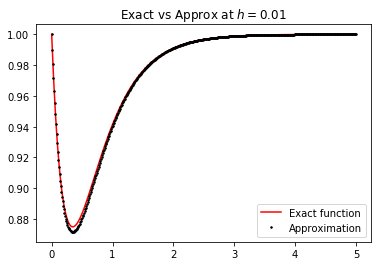

In [10]:
import matplotlib.pyplot as plt 

h = 0.01
x_n,y_n,exact,error=Euler(5,0,1,h,f,y_exact)   
plt.plot(x_n,y_exact(x_n),'r-',label = 'Exact function');
plt.plot(x_n,y_n,'k.',markersize = 3, label= "Approximation");
plt.legend()
plt.title('Exact vs Approx at $h=%s$' %(h));

**Results**

Notice that the approximation is worst where the function is changing rapidly. This should not be too surprising.  Recall that we’re using *tangent lines* to get the approximations and so the value of the tangent line at a given $x$ will often be significantly different than the function due to the rapidly changing function at that point.

Also, in this case, because the function ends up fairly flat as t increases, the tangents start looking like the function itself and so the approximations are very accurate.  This won’t always be the case of course.

**Conclusion** 

So, Euler’s method is a nice method for approximating fairly nice solutions that **don’t change rapidly**.  However, not all solutions will be this nicely behaved.  There are other approximation methods that do a much better job of approximating solutions.  

Also notice that **we don’t generally** have the *Exact solution* around to check the accuracy of the approximation.  We generally try to find *bounds on the error* for each method that will tell us how well an approximation should do. We make use of **Global Truncation Errors** to find these upper bounds (which I don't really get). 

**Rounding Error**

Up to now, we have ignored the consequence of the rounding error to the accuracy of our solution. In step $n$ of the Euler method, the rounding error is roughly of the magnitude $\epsilon_{mach}y_n$ where $\epsilon_{mach}$ is the **machine epsilon**. Assuming that the rounding errors are all of approximately the same size, the combined rounding error in $N$ steps is roughly $N\epsilon_{mach}y_n$  if all errors points in the same direction. Since the number of steps is inversely proportional to the step size $h$, the total rounding error is proportional to $\frac{\epsilon_{mach}}{h}$. In reality, however, it is extremely unlikely that all rounding errors point in the same direction. If instead it is assumed that the rounding errors are independent rounding variables, then the total rounding error is proportional to $\frac{\epsilon_{mach}}{\sqrt{h}}$.

Thus, for extremely small values of the step size $h$, the truncation error will be small but the effect of rounding error may be big

**Example 3: *Solving Higher-Order ODE using Euler's Method* **

Consider the *Third-Order ODE*:
$$   \left\{
    \begin{array}\
    y'''+4y''+6y'+4y = \gamma(x) \\
    y(0) = 0 \\
    y'(0) = -1 \\
    y''(0) = 0 \\
    \end{array}
  \right.$$
We need to turn this ODE into a *First-Order ODE*. Let us introduce the new variables $q_1,q_2,q_3$, we can rewrite the *three* first-order differential equations: 
$$   \left.
    \begin{array}\
    q_1(x)=y(x) \\
    q_2(x) = y'(x) \\
    q_3(x) = y''(x) \\
        \end{array}
  \right.$$
After differentiating we get: 
$$   \left\{
    \begin{array}\
    q_1'(x)=y'(x)=q_2(x) \\
    q_2'(x) = y''(x)=q_3(x) \\
    q_3'(x) = y'''(x) = \gamma(x)-4y''(x)-6y'(x)-4y(x)\\
    \quad \quad \quad \quad \quad = \gamma(x)-4q_3(x)-6q_2(x)-4q_1(x)
        \end{array}
  \right.$$
  
We can further simplify by writing this as a single first order matrix differential equation.

$$\boldsymbol{q'(x)} = \begin{bmatrix} q_1'(x)\\
q_2'(x)\\
q_3'(x)
\end{bmatrix} =
\underbrace{\begin{bmatrix} 0 & 1 & 0\\
0 & 0 & 1\\
-4 & -6 & -4
\end{bmatrix}}_{\boldsymbol{A}}
\underbrace{\begin{bmatrix} q_1(x)\\ q_2(x)\\ q_3(x)
\end{bmatrix}}_{\boldsymbol{q(x)}} + 
\underbrace{\begin{bmatrix} 0 \\ 0\\ 1
\end{bmatrix}}_{\boldsymbol{b}}\gamma(x) $$

$$\implies \quad \boldsymbol{q'(x)} = \boldsymbol{Aq(x)}+ \boldsymbol{b}\gamma(x) \quad \quad (\ast)$$

For this example, let us choose $\gamma(x) = 1$, then $(\ast)$ becomes: 
$$ \boldsymbol{q'(x)} = \underbrace{\boldsymbol{Aq(x)}+ \boldsymbol{b}}_{\boldsymbol{F(x,q(x))}}$$

Now we have to solve the *problem*: 
$$ \boldsymbol{q'(x)} = \boldsymbol{F(x,q(x))}, \quad \boldsymbol{q_0} = \begin{bmatrix} 0 \\ -1\\ 0\end{bmatrix} $$
where $\boldsymbol{q_0}$ is the *initial conditions*. 

This is a *general first-order ODE* which can be easily solved using the Euler's Method. The only difference is that everything is a vector. 

$$ \boldsymbol{q_{n+1}(x)} = \boldsymbol{q_n(x)}+h\boldsymbol{F(x,q(x))} $$

**Note**: The exact solution to this equation is given by 
$$y(x) = \frac{1}{4}+e^{-x}\left(cos(x)-\frac{5}{2}sin(x)\right)-\frac{5}{4}e^{-2x} \quad x\geq0$$
which will be useful to check the accuracy of my solution.

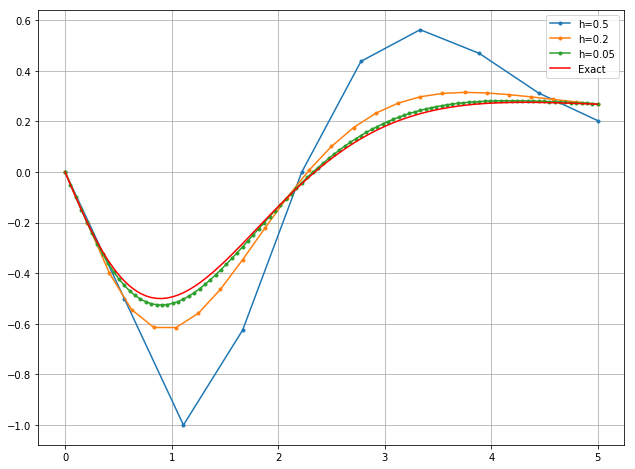

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def higher_order(X_M,x_0,q_0,A,b,h,gamma):
    if X_M<x_0:     # makes sure that X_M>x_0 
        raise ValueError("X_M must be greater than x_0")  
        
    N = int((X_M-x_0)/h)
    x_n = np.linspace(x_0,X_M,N)
    Q_n = np.zeros((len(q_0),len(x_n)))
    Q_n[:,0]=q_0
    for i in range(len(x_n)-1):
        F=np.add(A@Q_n[:,i],np.multiply(b,gamma(x_n[i])))   #AQ_n + b*gamma(x)
        Q_n[:,i+1] = Q_n[:,i]+h*F
    return x_n,Q_n[0,:]           #we are only interested in the first row of Q_n because that is equal to y(x)

x_0,X_M = 0,5

y_Exact= lambda x: (1/4)+np.exp(-x)*(np.cos(x)-(5/2)*np.sin(x))-(5/4)*np.exp(-2*x)

q_0 = [0,-1,0]

A = [[0,1,0],
     [0,0,1],
     [-4,-6,-4]]

b= [0,0,1]

H = [0.5,0.2,0.05]

gamma = lambda x: 1      #function which we have taken to be 1 but it can be anything

[(plt.plot(higher_order(X_M,x_0,q_0,A,b,h,gamma)[0],
           higher_order(X_M,x_0,q_0,A,b,h,gamma)[1],'-o',
           markersize=3, 
           label = 'h={0}'.format(h))) for h in H]

X = np.linspace(x_0,X_M,100)
plt.plot(X,y_Exact(X),'r',label = 'Exact')
plt.legend()
plt.grid(True)
plt.gcf().set_size_inches(10.5, 8)


### 2.3 Runge-Kutta Method

Euler's Method is only the *first-order* accurate: neverthless, it is simple and cheap to implement because, to obtain $y_{n+1}$ from $y_n$, we only require a single evaluation of the function $f$, at $(x_n,y_n)$. *Runge-Kutta* methods aim to achieve a **higher accuracy** by sacrificing the **efficiency** of the Euler's Method through re-evaluating $f(\dot,\dot)$ at points **intermediate** to the points $(x_n,y(x_n))$ and $(x_{n+1},y(x_{n+1}))$

Consider, for example, the **Family of second-order Runge-Kutta Methods**

$$ y_{n+1} = y_n + h\underbrace{(ak_1+bk_2)}_{\Phi(x_n,y_n;h)}\quad \quad (2.3)$$ 
where 

$$ \left.
    \begin{array}\ k_1 = f(x_n,y_n),\\
k_2 = f(x_n+\alpha h,y_n+\beta hk_1))\end{array}
  \right\} \quad \quad (2.4)$$

and where the parameters $a,\ b,\ \alpha, \ \beta$ are to be determined such that the *Truncation Error* is reduced.

$$ \Phi(x_n,y_n;h)= af(x_n,y_n)+bf(x_n+\alpha h,y_n+\beta hf(x_n,y_n))$$

After some simple manipulation as shown on pp 326-327 of *An introduction to Numerical Analysis* it can be seen that this is achieved when:

$$\beta=\alpha, \quad a=1-\frac{1}{2\alpha}, \quad b=\frac{1}{2\alpha}, \quad \alpha\neq0$$

Two examples of *Second-Order Runge-Kutta Methods* of the form $(2.3)-(2.5)$ are **The Modified Euler Method** and **The Improved Euler Method**.
* **The Modified Euler Method**: In this case we take $\alpha = \frac{1}{2}$ to obtain:
$$y_{n+1}=y_n + hf(x_n+\frac{1}{2}h,y_n+\frac{1}{2}hf(x_n,y_n))$$

* **The Improved Euler Method**: This is arrived by choosing $\alpha = 1$ which gives:
$$y_{n+1}=y_n + \frac{1}{2}h[f(x_n,y_n)+f(x_n+h,y_n+hf(x_n,y_n))]$$

**Classical Fourth Order Method**

One of the most frequently used methods of the Runge_Kutta Family is often known as the *Classical Fourth Order Method*: 

$$ y_{n+1} = y_n+\underbrace{\frac{1}{6}h(k_1+2k_2+2k_3+k_4)}_{h\Phi(x_n,y_n;h)}, \quad \quad (2.5)$$
where
$$
  \left.
    \begin{array}\
     k_1 = f(x_n,y_n), \\
k_2 = f(x_n+\frac{1}{2}h,y_n+\frac{1}{2}hk_1), \\
k_3 = f(x_n+\frac{1}{2}h,y_n+\frac{1}{2}hk_2), \\
k_4 = f(x_n+h,y_n+hk_3)  
    \end{array}
  \right\} \quad \quad (2.6)
$$

Here $k_2$ and $k_3$ represent approximations to the derivatives $y'$ at the points on the solution curve, intermediate between $(x_n,y(x_n))$ and $(x_{n+1},y(x_{n+1}))$, and $\Phi(x_n,y_n;h)$ is a **weighted average** of the $k_i, i = 1,2,3,4$, the weights corresponding to those of **Simpson's Rule**. 